# sCREEN dataset preliminary analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
%config InlineBackend.figure_format='retina'

path_image = "WHERE SAVE RESULTS"


In [2]:
path_to_dataset = 'sCREEN-dataset.txt'
data = pd.read_csv(path_to_dataset)
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data

id          tag_id                time      x      y  z
0        6135101  0x00205EFB1721 2016-07-30 23:55:00  13.58  29.24  0
1        5777232  0x00205EFB1243 2016-07-30 23:55:00  15.49  32.16  0
2        5916525  0x00205EFB1721 2016-07-30 23:54:58  13.55  29.23  0
3        5942875  0x00205EFB1243 2016-07-30 23:54:58  15.54  32.19  0
4        6109080  0x00205EFB1721 2016-07-30 23:54:58  13.53  29.18  0
...          ...             ...                 ...    ...    ... ..
4622434  1232830  0x00205EFE0F22 2016-07-01 03:43:43  15.71  31.74  0
4622435  1646429  0x00205EFE0F22 2016-07-01 03:43:42  15.73  31.41  0
4622436  1304749  0x00205EFE0FC7 2016-07-01 03:43:42  16.86  30.63  0
4622437  1343292  0x00205F0901E1 2016-07-01 03:43:42  15.44  32.56  0
4622438  1273931  0x00205EFB1721 2016-07-01 03:43:42  15.73  32.40  0

[4622439 rows x 6 columns]

In [3]:
data['hour'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['date'] = pd.to_datetime(data['time'], format='%Y-%m-%d').dt.date
data

id          tag_id                time      x      y  z  \
0        6135101  0x00205EFB1721 2016-07-30 23:55:00  13.58  29.24  0   
1        5777232  0x00205EFB1243 2016-07-30 23:55:00  15.49  32.16  0   
2        5916525  0x00205EFB1721 2016-07-30 23:54:58  13.55  29.23  0   
3        5942875  0x00205EFB1243 2016-07-30 23:54:58  15.54  32.19  0   
4        6109080  0x00205EFB1721 2016-07-30 23:54:58  13.53  29.18  0   
...          ...             ...                 ...    ...    ... ..   
4622434  1232830  0x00205EFE0F22 2016-07-01 03:43:43  15.71  31.74  0   
4622435  1646429  0x00205EFE0F22 2016-07-01 03:43:42  15.73  31.41  0   
4622436  1304749  0x00205EFE0FC7 2016-07-01 03:43:42  16.86  30.63  0   
4622437  1343292  0x00205F0901E1 2016-07-01 03:43:42  15.44  32.56  0   
4622438  1273931  0x00205EFB1721 2016-07-01 03:43:42  15.73  32.40  0   

             hour        date  
0        23:55:00  2016-07-30  
1        23:55:00  2016-07-30  
2        23:54:58  2016-07-30  
3        23:54:58  2016-07-30  
4        23:54:58  2016-07-30  
...           ...         ...  
4622434  03:43:43  2016-07-01  
4622435  03:43:42  2016-07-01  
4622436  03:43:42  2016-07-01  
4622437  03:43:42  2016-07-01  
4622438  03:43:42  2016-07-01  

[4622439 rows x 8 columns]

## 1. Macro analysis and spatial distribution

In [4]:
print("Number of data points:", len(set(data['id'])))
print("Number of unique tags:", len(set(data['tag_id'])))
print("Starting observation:", data['time'].min())
print("Final observation:", data['time'].max())
print("Minimum x coordinate:", data['x'].min())
print("Maximum x coordinate:", data['x'].max())
print("Minimum y coordinate:", data['y'].min())
print("Maximum y coordinate:", data['y'].max())

Number of data points: 4622439
Number of unique tags: 175
Starting observation: 2016-07-01 03:43:42
Final observation: 2016-07-30 23:55:00
Minimum x coordinate: -3.63
Maximum x coordinate: 49.7
Minimum y coordinate: -3.08
Maximum y coordinate: 36.97


In [6]:
num = 100000
data_plot = data[0:num]
x = data_plot['x'].values
y = data_plot['y'].values

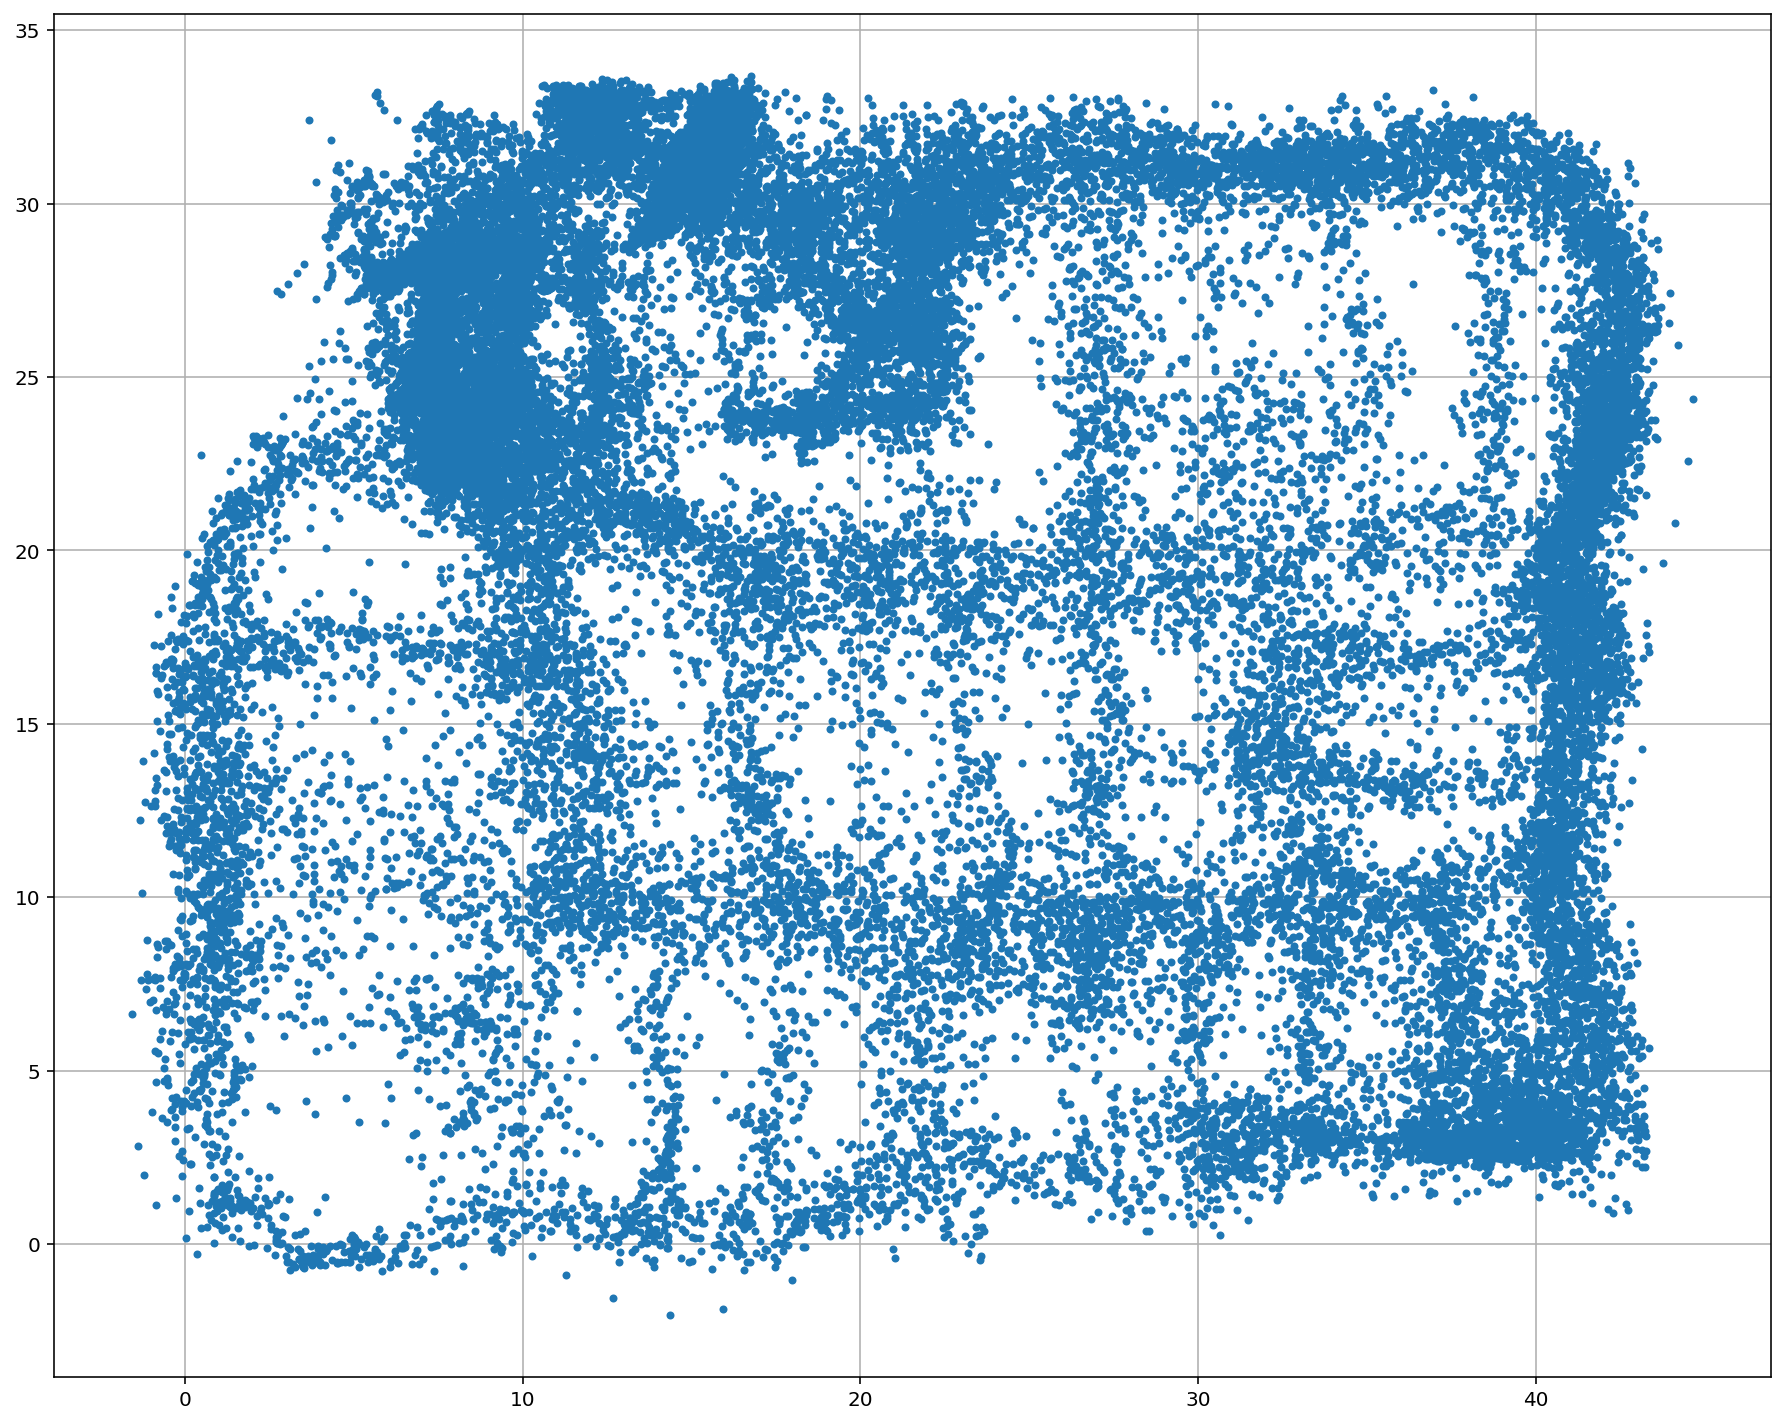

In [10]:
fig, ax = plt.subplots(figsize=(12.5, 10))
ax.plot(x, y, '.')
#ax.set(title=f'Spatial coordinates. Sample of {num} data points')
ax.grid()
fig.tight_layout()

plt.savefig(f"{path_image}\\plot_100000.png")

plt.show()

## 2. Tag analysis

tag_id
0x00205EFB1721    1234224
0x00205EFB1243    1208417
0x00205EFB161F      62310
0x00205F151090      52558
0x00205EFE0F24      51341
                   ...   
0x00205F1510B3          1
0x00205EFB134B          1
0x00205EFB1344          1
0x00205F1510D5          1
0x00205EA907AE          1
Name: id, Length: 175, dtype: int64


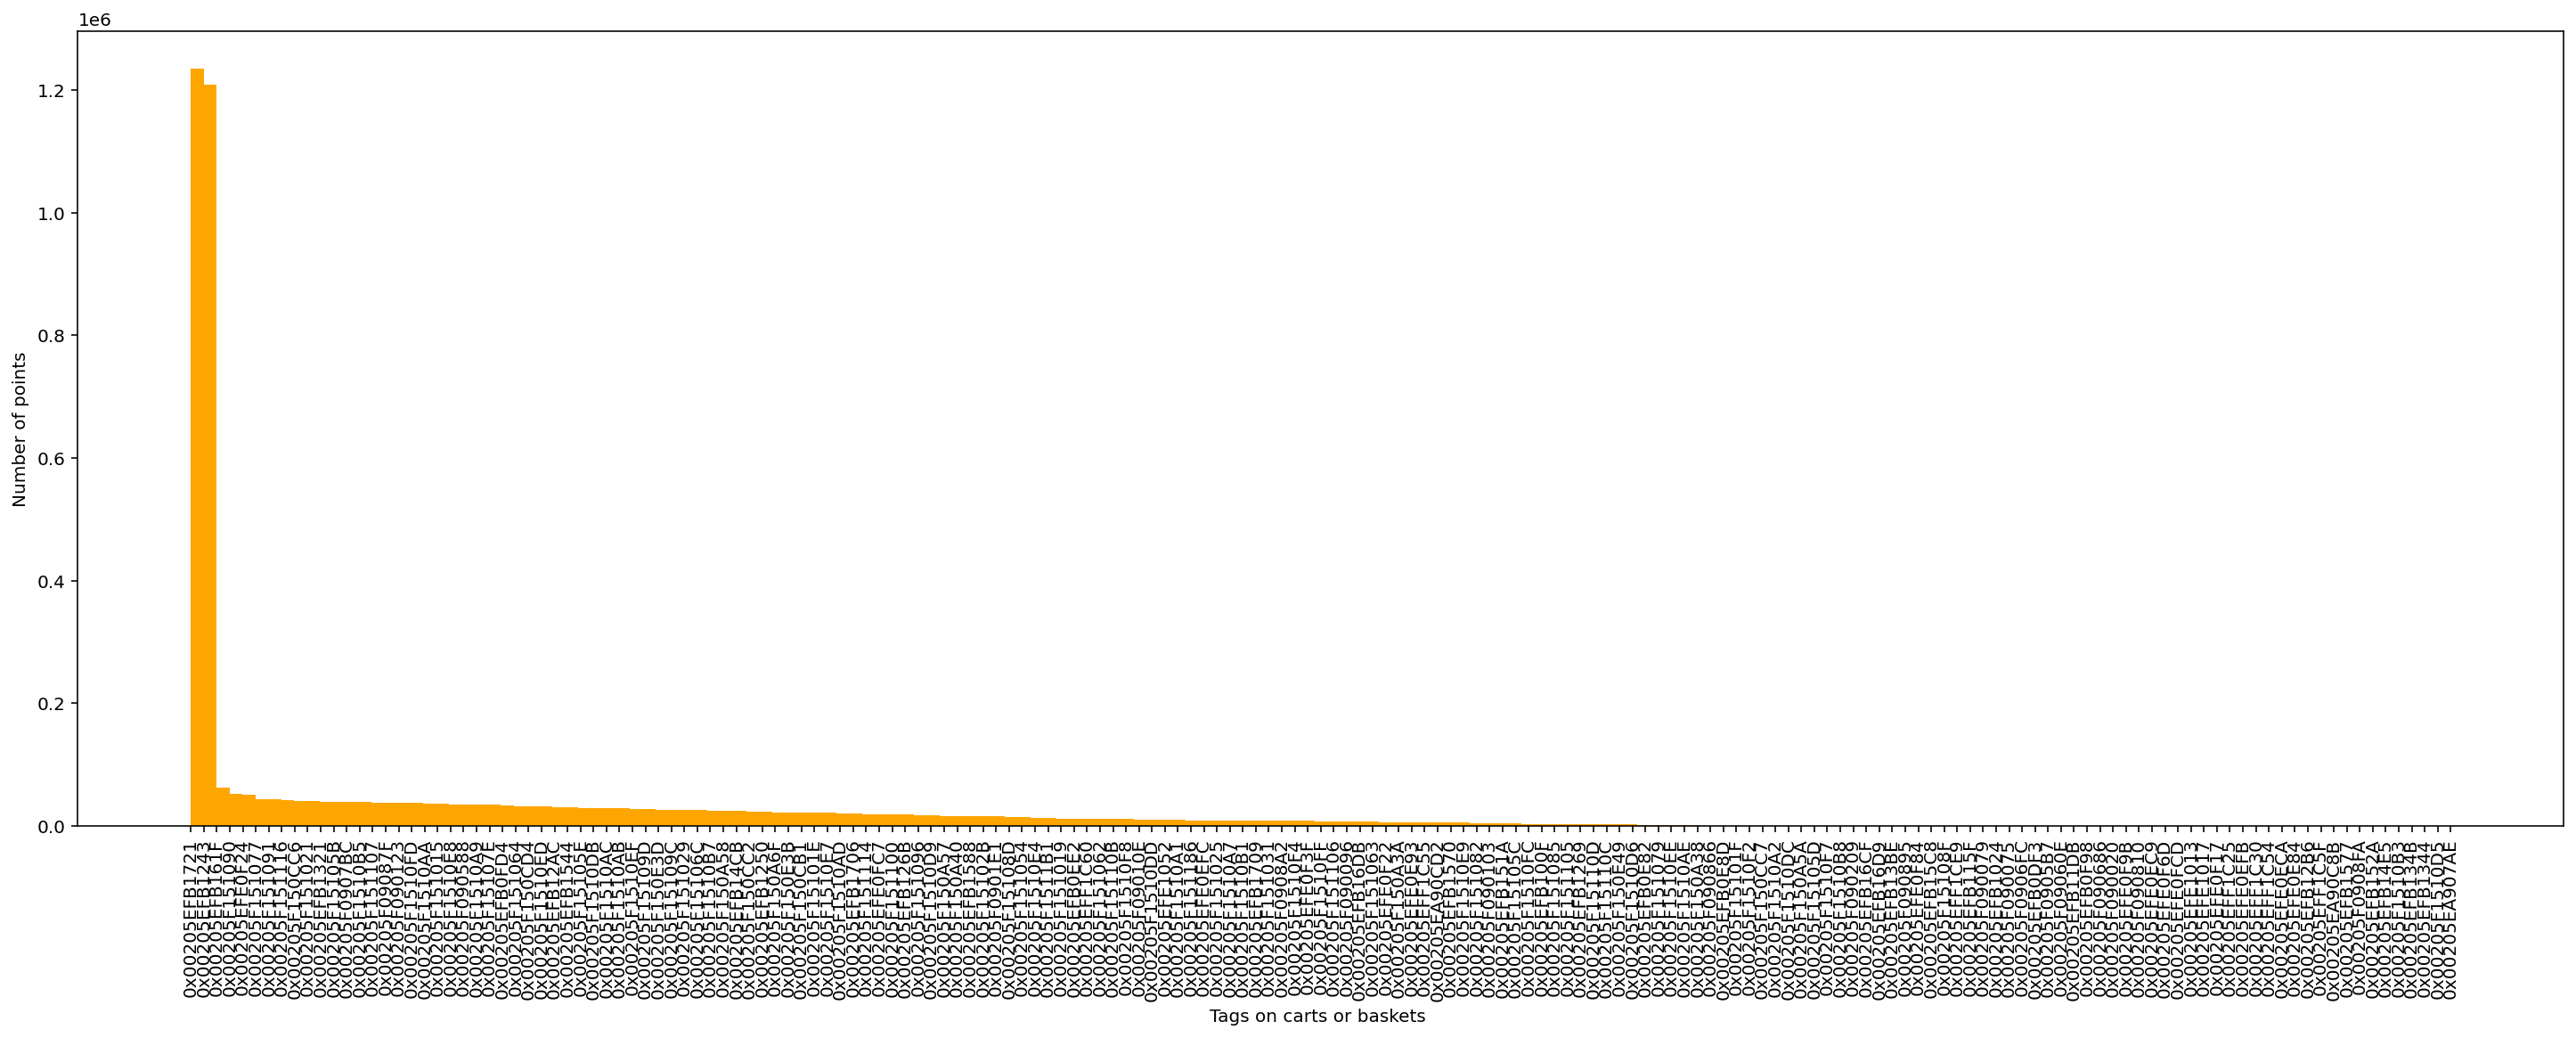

In [9]:
tag_df = data.groupby(data['tag_id'])['id'].count().sort_values(ascending=False)
print(tag_df)
fig, ax = plt.subplots(figsize=(20, 8))
ax.hist(tag_df.keys(),
        weights=tag_df.values,
        bins=175, facecolor='orange')
#ax.set(title='Number of data points per tag')
plt.xticks(rotation=90)
fig.tight_layout()
plt.xlabel("Tags on carts or baskets ")
plt.ylabel("Number of points")

plt.savefig(f"{path_image}\\dist_tag.png")

plt.show()

              id          tag_id                time      x      y  z  \
4356195  1780842  0x00205EFB13BE 2016-07-12 06:32:15  14.48  -0.49  0   
4356205  1716609  0x00205EFB13BE 2016-07-12 06:32:13  14.70  -0.43  0   
4356213  1649818  0x00205EFB13BE 2016-07-12 06:32:13  14.66  -0.87  0   
4356219  1780841  0x00205EFB13BE 2016-07-12 06:32:12  14.53  -1.04  0   
4356232  1932406  0x00205EFB13BE 2016-07-12 06:32:11  14.73  -0.99  0   
4356240  1598401  0x00205EFB13BE 2016-07-12 06:32:10  14.83  -0.85  0   
4356254  1716607  0x00205EFB13BE 2016-07-12 06:32:08  15.47  -0.82  0   
4356262  1616454  0x00205EFB13BE 2016-07-12 06:32:07  16.56  -0.98  0   
4356269  1642074  0x00205EFB13BE 2016-07-12 06:32:07  17.49  -0.75  0   
4356275  1523971  0x00205EFB13BE 2016-07-12 06:32:06  18.06   0.02  0   
4356282  1698626  0x00205EFB13BE 2016-07-12 06:32:05  18.83   0.54  0   
4356285  1737123  0x00205EFB13BE 2016-07-12 06:32:04  19.32   1.04  0   
4356292  1881024  0x00205EFB13BE 2016-07-12 06:32:0

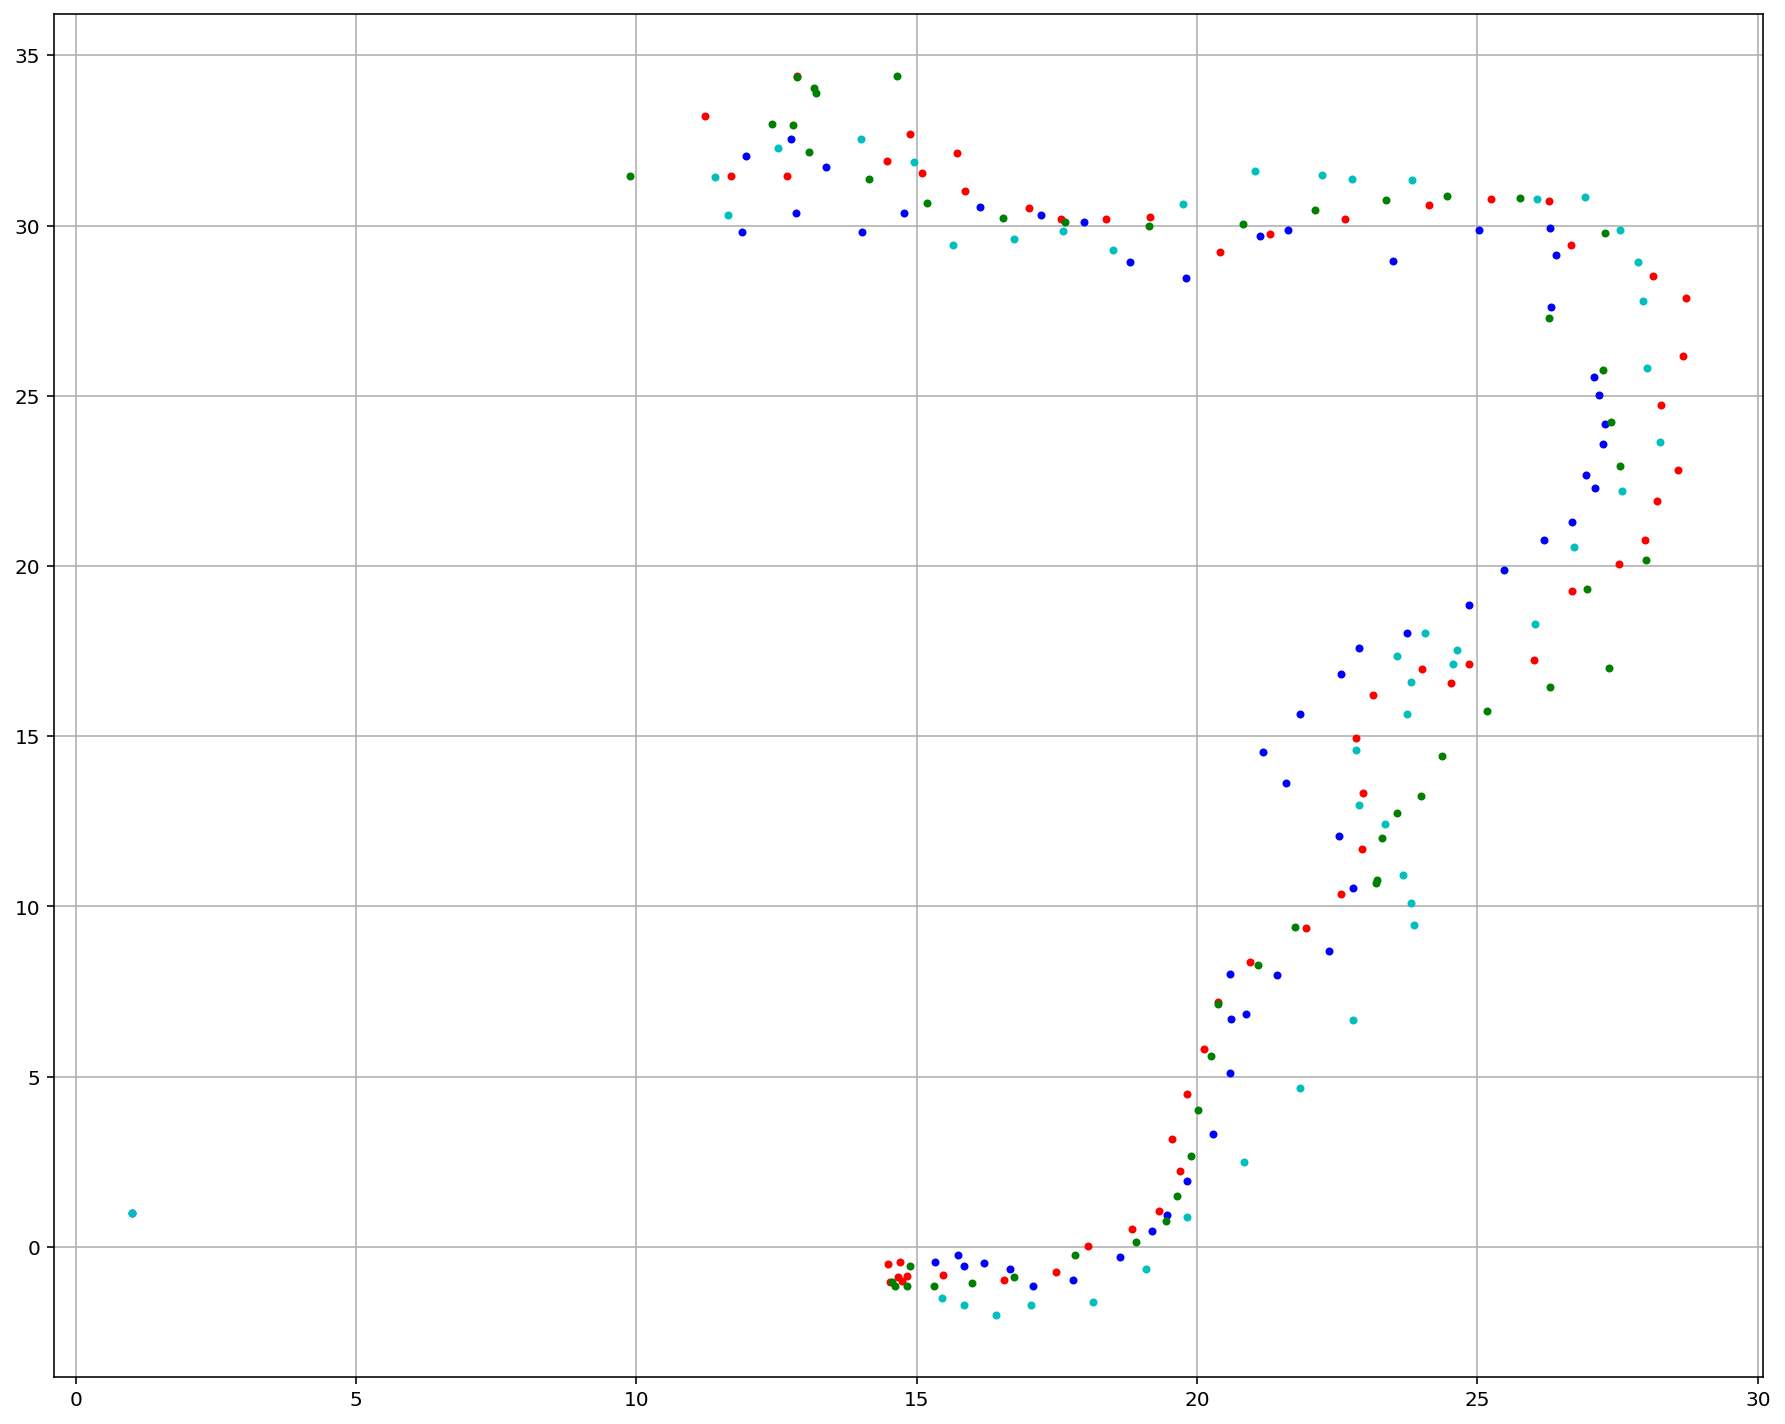

In [26]:
tag1 = data.loc[data['tag_id'] == '0x00205EFB13BE']
x1 = tag1['x'].values
y1 = tag1['y'].values

tag2 = data.loc[data['tag_id'] == '0x00205F090895']
x2 = tag2['x'].values
y2 = tag2['y'].values

tag3 = data.loc[data['tag_id'] == '0x00205EFE0F84']
x3 = tag3['x'].values
y3 = tag3['y'].values

tag4 = data.loc[data['tag_id'] == '0x00205EFB15C8']
x4 = tag4['x'].values
y4 = tag4['y'].values

print(tag1)
print(tag2)

fig, ax = plt.subplots(figsize=(12.5, 10))
#img = plt.imread("mappa.jpg")
#ax.imshow(img, extent=[x.min(), x.max(), y.min(), y.max()])
ax.plot(x1, y1, '.r')
ax.plot(x2, y2, '.b')
ax.plot(x3, y3, '.g')
ax.plot(x4, y4, '.c')

ax.grid()
fig.tight_layout()
plt.show()

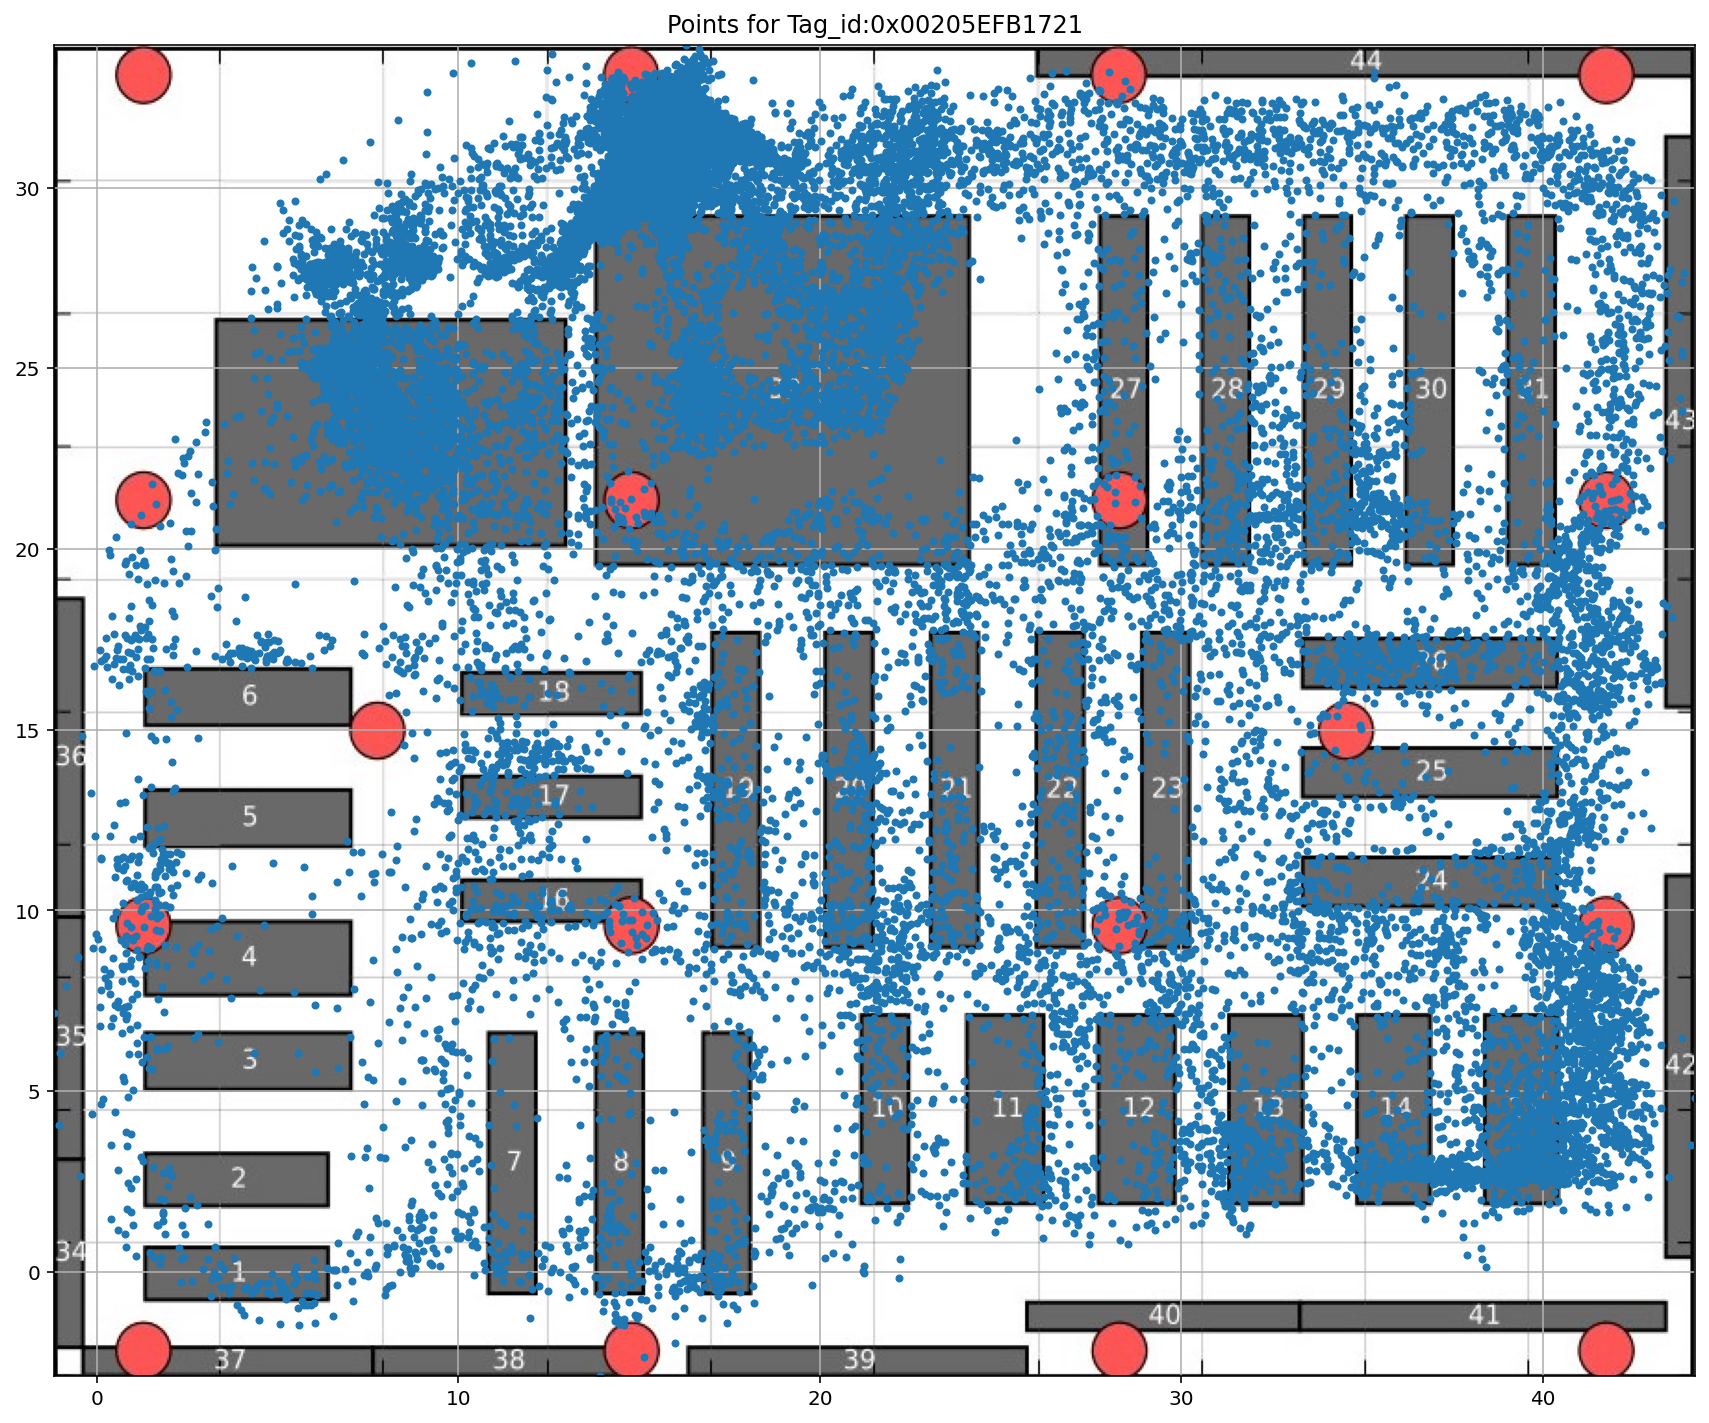

In [48]:
#0x00205EFB1243
tag_1 = data.loc[data['tag_id'] == '0x00205EFB1721']
x = tag_1['x'].values
y = tag_1['y'].values

fig, ax = plt.subplots(figsize=(12.5, 10))
img = plt.imread("mappa.jpg")
ax.imshow(img, extent=[x.min(), x.max(), y.min(), y.max()])
ax.plot(x, y, '.')
ax.set(title=f'Points for Tag_id:0x00205EFB1721')
ax.grid()
fig.tight_layout()
plt.show()


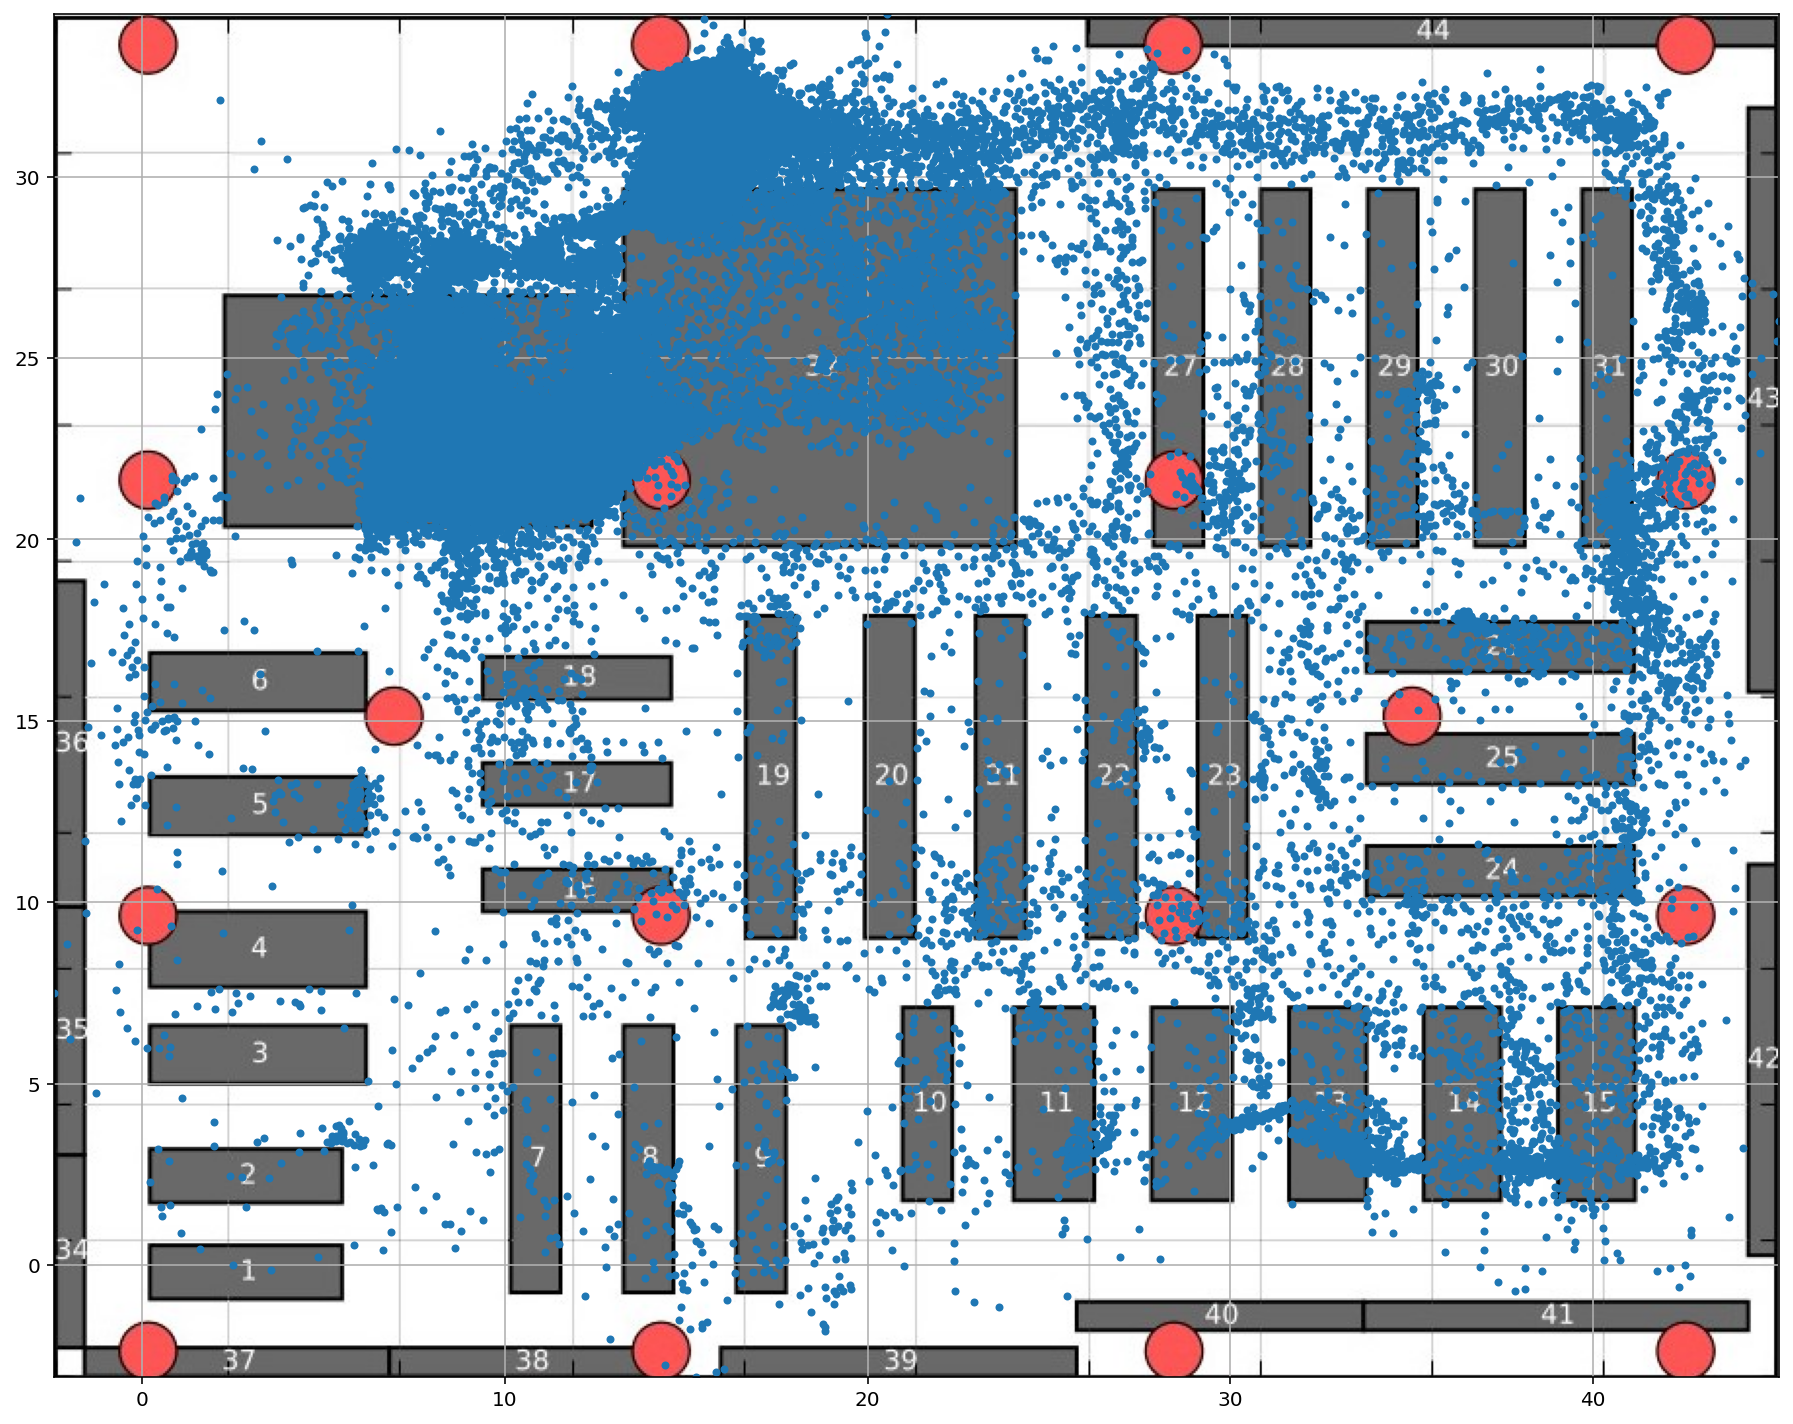

In [30]:
#0x00205EFB1243
tag_2 = data.loc[data['tag_id'] == '0x00205EFB1243']
x = tag_2['x'].values
y = tag_2['y'].values

fig, ax = plt.subplots(figsize=(12.5, 10))
img = plt.imread("mappa.jpg")
ax.imshow(img, extent=[x.min(), x.max(), y.min(), y.max()])
ax.plot(x, y, '.')
#ax.set(title=f'Points for Tag_id:0x00205EFB1243')
ax.grid()
fig.tight_layout()

plt.savefig(f"{path_image}\\tag_2_rumore.png")

plt.show()

## 3. Time distributions

### Daily

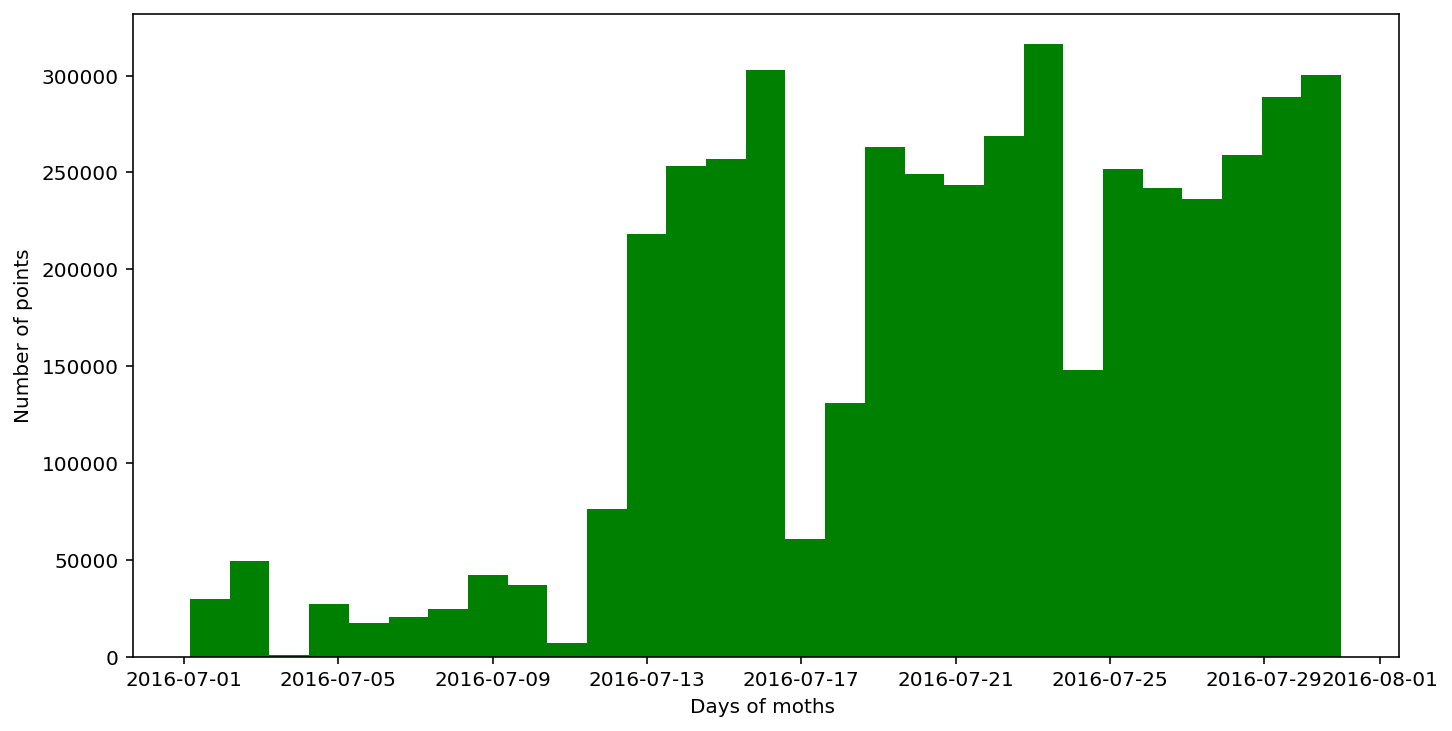

[ 29545.  49125.    653.  26953.  17147.  20599.  24793.  42286.  37132.
   7209.  76306. 218378. 253499. 256768. 302983.  60543. 130876. 263139.
 249187. 243532. 268980. 316069. 148145. 251929. 242006. 236319. 259217.
 288810. 300311.]


In [5]:
fig, ax = plt.subplots(figsize=(10,5))
n, bins, p = ax.hist(data['time'], bins=29, facecolor='g')
#ax.set(title='Number of daily data points')
fig.tight_layout()
plt.xlabel("Days of moths ")
plt.ylabel("Number of points")

plt.savefig(f"{path_image}\\daily.png") 

plt.show()

print(n)

time      1       2       4       5       6       7       8        9    10  \
time                                                                         
1        NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN  NaN   
2        NaN     NaN     NaN     NaN     NaN     NaN     NaN      NaN  NaN   
3        7.0     NaN     7.0     9.0     NaN     NaN     3.0      6.0  NaN   
4       22.0    13.0    16.0     8.0     NaN    14.0    72.0      7.0  NaN   
5      524.0  1269.0   777.0   494.0    53.0   308.0    17.0    758.0  NaN   
6      918.0  1772.0   492.0  1176.0    19.0   787.0   291.0   1843.0  NaN   
7     1283.0  4093.0  2179.0  1589.0   745.0  1117.0  3050.0   1295.0  NaN   
8     2168.0  4264.0  1715.0  2732.0  1574.0   970.0  4732.0   4918.0  7.0   
9     1830.0  5542.0  3487.0  2717.0  2216.0  1991.0  3838.0  10096.0  NaN   
10    1536.0  6380.0  1850.0  1811.0   660.0  2331.0  3489.0   6416.0  NaN   
11    1449.0  4376.0  1174.0   383.0   766.0  1387.0  3593.0   6

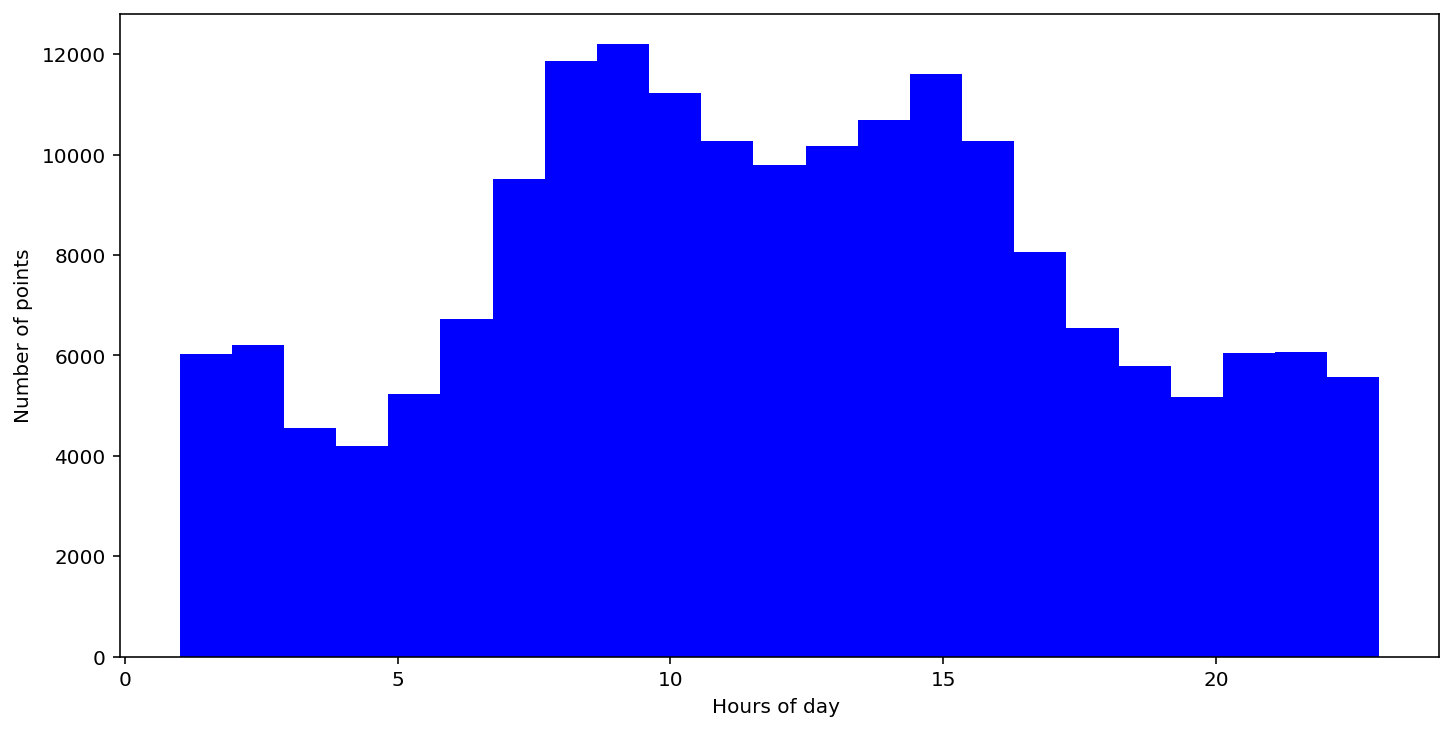

In [6]:
hour_day = data.groupby([data['time'].dt.hour, data['time'].dt.day])['id'].count().unstack()
print(hour_day)
hourly_mean = hour_day.mean(axis=1)
print(hourly_mean)
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(hourly_mean.keys(),
        weights=hourly_mean.values,
        bins=23, facecolor='blue')
#ax.set(title='Average hourly number of data points')
fig.tight_layout()
plt.xlabel("Hours of day ")
plt.ylabel("Number of points")

plt.savefig(f"{path_image}\\hours.png")

plt.show()

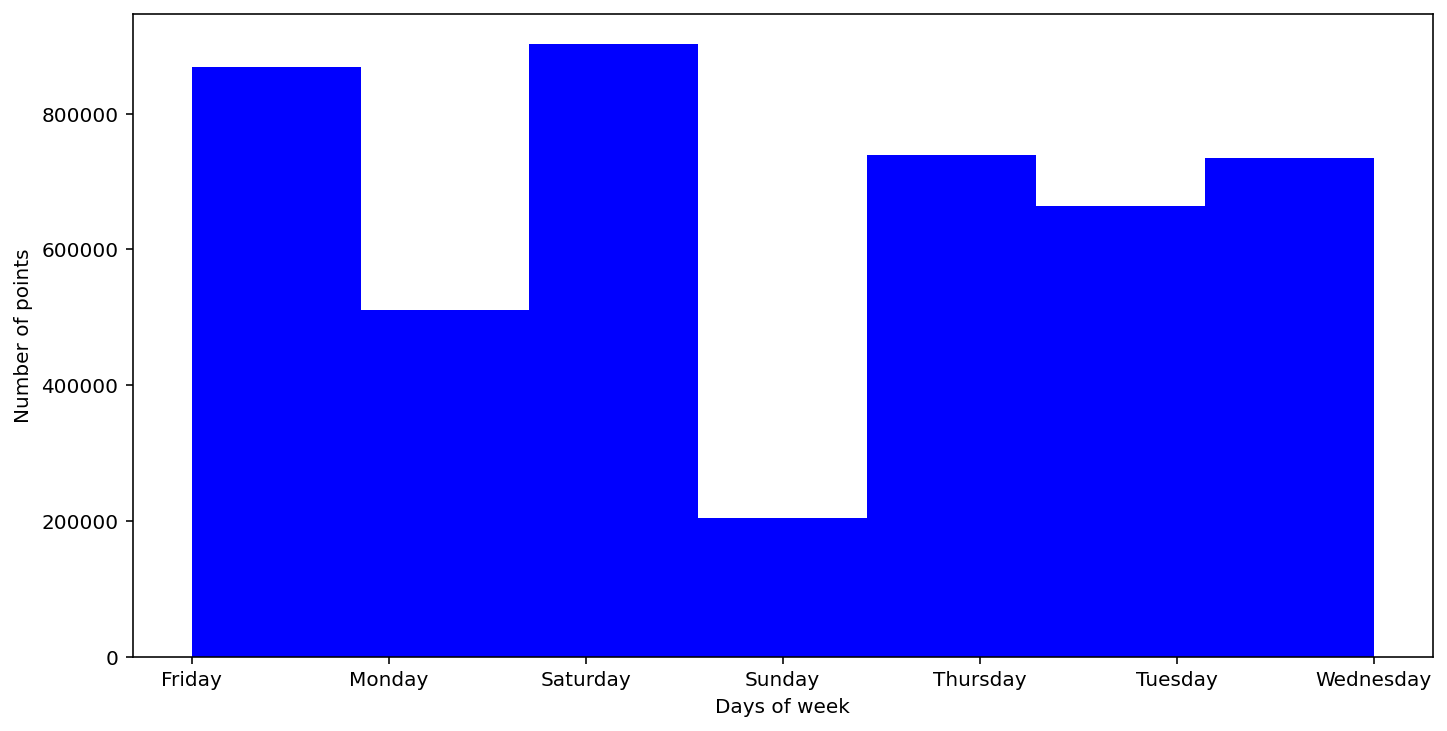

In [8]:
week_df = data.groupby(data['time'].dt.day_name())['id'].count()

fig, ax = plt.subplots(figsize=(10,5))
ax.hist(week_df.keys(),
        weights=week_df.values,
        bins=7, facecolor='blue')
#ax.set(title='Total number of data points in each day of the week')
fig.tight_layout()
plt.xlabel("Days of week")
plt.ylabel("Number of points")

plt.savefig(f"{path_image}\\week.png")

plt.show()

In [64]:
mask = (data['hour'] > datetime.time(6, 0)) & (data['hour'] <= datetime.time(21, 0))
daily_points = data.loc[mask]
print(daily_points)

              id          tag_id                time      x      y  z  \
18232    5915206  0x00205EFB1243 2016-07-30 21:00:00  15.61  32.30  0   
18233    6048963  0x00205EFB1721 2016-07-30 20:59:59  13.49  29.14  0   
18234    6169455  0x00205EFB1721 2016-07-30 20:59:59  13.63  29.27  0   
18235    6121373  0x00205EFB1243 2016-07-30 20:59:59  15.63  32.28  0   
18236    6127097  0x00205EFB1243 2016-07-30 20:59:57  15.56  32.22  0   
...          ...             ...                 ...    ...    ... ..   
4621881  1325334  0x00205EFE1052 2016-07-01 06:02:03  30.34   2.57  0   
4621882  1376709  0x00205EFE1052 2016-07-01 06:01:59  31.23   2.57  0   
4621883  1284219  0x00205EFE1052 2016-07-01 06:01:09  31.74   3.25  0   
4621884  1384412  0x00205EFE1052 2016-07-01 06:00:53  31.56   3.52  0   
4621885  1289372  0x00205EFE1052 2016-07-01 06:00:51  31.73   3.31  0   

             hour        date  
18232    21:00:00  2016-07-30  
18233    20:59:59  2016-07-30  
18234    20:59:59  2016-07-

### Nightly

In [91]:
late_points = pd.concat([data, daily_points]).drop_duplicates(keep=False)
late_points

id          tag_id                time      x      y  z  \
0        6135101  0x00205EFB1721 2016-07-30 23:55:00  13.58  29.24  0   
1        5777232  0x00205EFB1243 2016-07-30 23:55:00  15.49  32.16  0   
2        5916525  0x00205EFB1721 2016-07-30 23:54:58  13.55  29.23  0   
3        5942875  0x00205EFB1243 2016-07-30 23:54:58  15.54  32.19  0   
4        6109080  0x00205EFB1721 2016-07-30 23:54:58  13.53  29.18  0   
...          ...             ...                 ...    ...    ... ..   
4622434  1232830  0x00205EFE0F22 2016-07-01 03:43:43  15.71  31.74  0   
4622435  1646429  0x00205EFE0F22 2016-07-01 03:43:42  15.73  31.41  0   
4622436  1304749  0x00205EFE0FC7 2016-07-01 03:43:42  16.86  30.63  0   
4622437  1343292  0x00205F0901E1 2016-07-01 03:43:42  15.44  32.56  0   
4622438  1273931  0x00205EFB1721 2016-07-01 03:43:42  15.73  32.40  0   

             hour        date  
0        23:55:00  2016-07-30  
1        23:55:00  2016-07-30  
2        23:54:58  2016-07-30  
3        23:54:58  2016-07-30  
4        23:54:58  2016-07-30  
...           ...         ...  
4622434  03:43:43  2016-07-01  
4622435  03:43:42  2016-07-01  
4622436  03:43:42  2016-07-01  
4622437  03:43:42  2016-07-01  
4622438  03:43:42  2016-07-01  

[872818 rows x 8 columns]

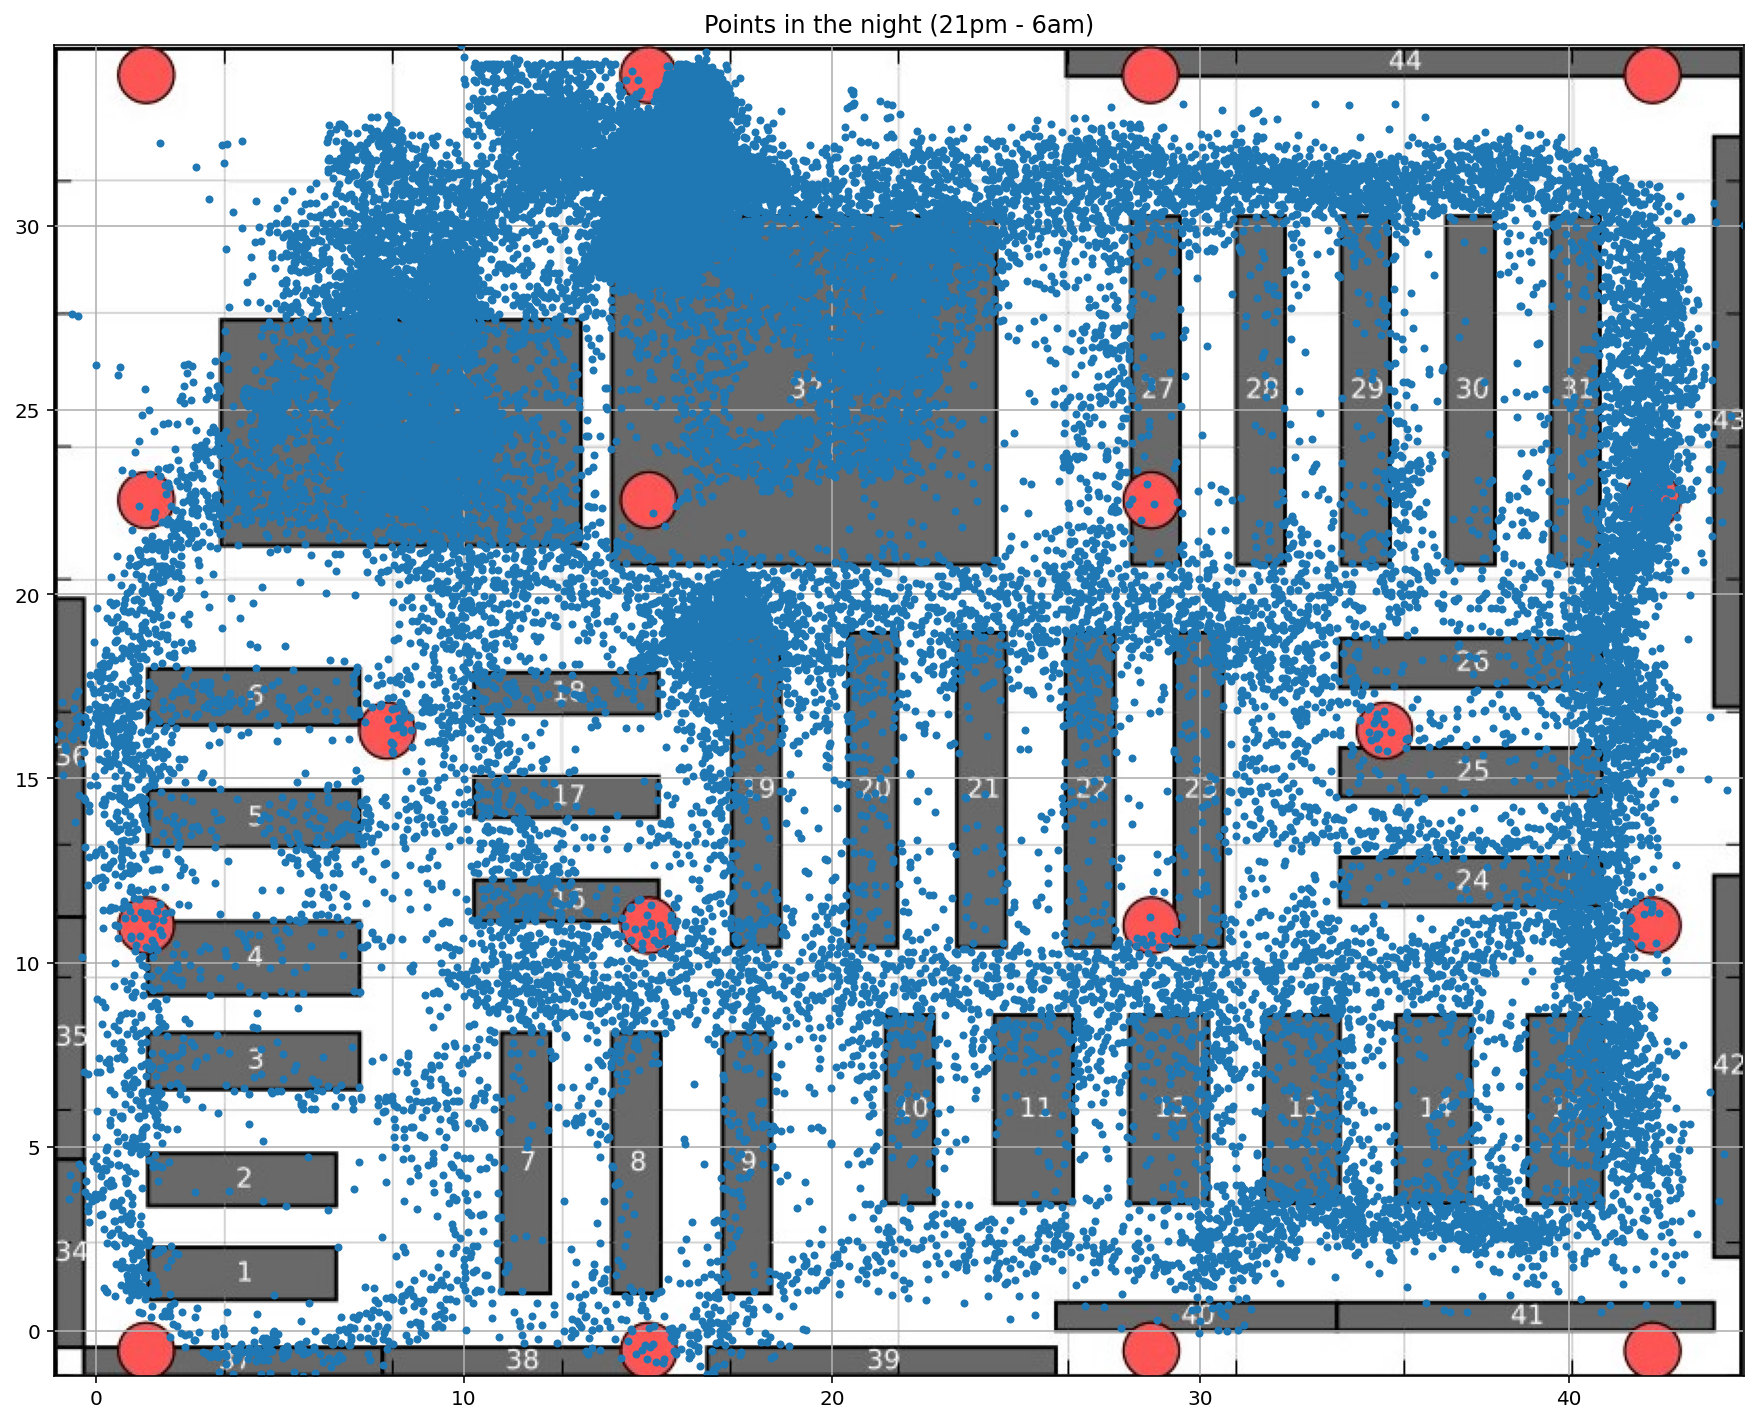

In [45]:
x = late_points['x'].values
y = late_points['y'].values
fig, ax = plt.subplots(figsize=(12.5, 10))
img = plt.imread("mappa.jpg")
ax.imshow(img, extent=[x.min(), x.max(), y.min(), y.max()])
ax.plot(x, y, '.')
ax.set(title=f'Points in the night (21pm - 6am)')
ax.grid()
fig.tight_layout()
plt.show()

In [46]:
print(late_points['date'].max())
print(late_points['date'].min())

2016-07-30
2016-07-01


<AxesSubplot:xlabel='hour'>

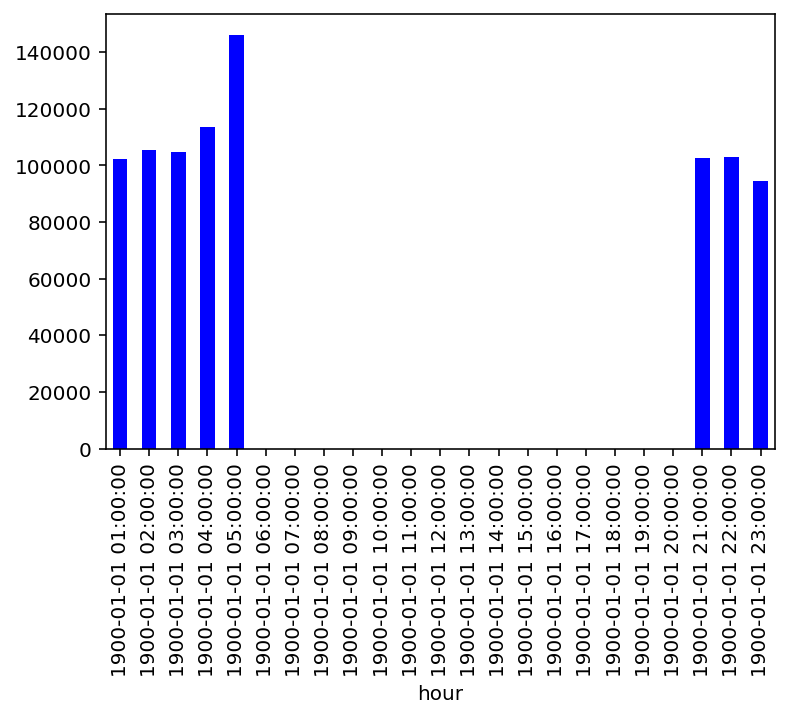

In [85]:
late_points['hour'] = pd.to_datetime(late_points['hour'], format='%H:%M:%S')
late_points.set_index('hour', drop=False, inplace=True)
late_points['hour'].groupby(pd.Grouper(freq='60Min')).count().plot(kind='bar', color='b')


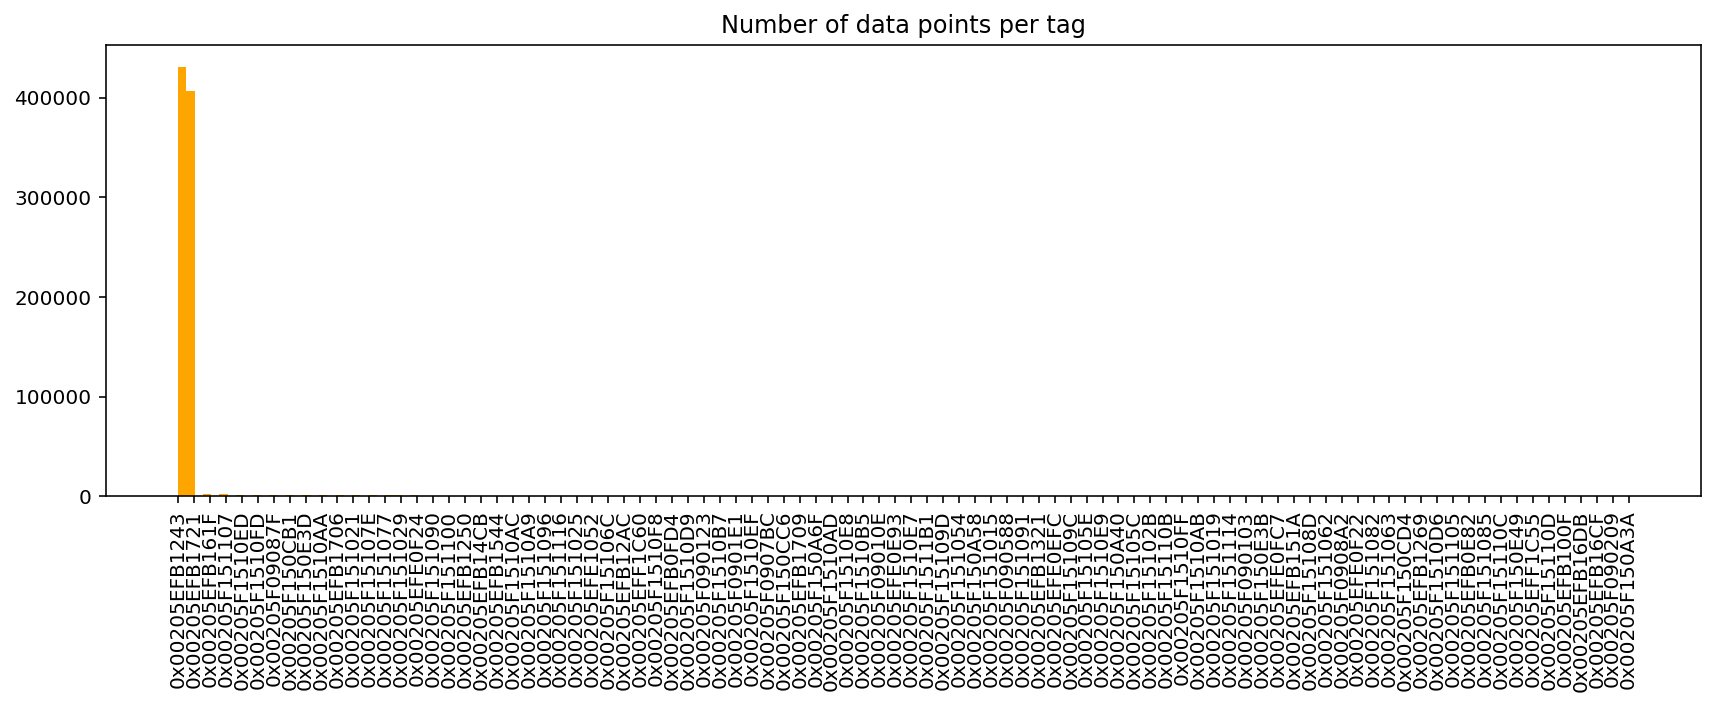

tag_id
0x00205EFB1243    430952
0x00205EFB1721    406806
0x00205EFB161F      2235
0x00205F151107      1794
0x00205F1510ED      1351
                   ...  
0x00205EFB100F        62
0x00205EFB16DB        23
0x00205EFB16CF        17
0x00205F090209        14
0x00205F150A3A         3
Name: id, Length: 92, dtype: int64


In [93]:
tag_df = late_points.groupby(data['tag_id'])['id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12,5))
ax.hist(tag_df.keys(),
        weights=tag_df.values,
        bins=175, facecolor='orange')
ax.set(title='Number of data points per tag')
plt.xticks(rotation=90)
fig.tight_layout()
plt.show()
print(tag_df)